In [1]:
from kitt_net import FeedForwardNet
from shelve import open as open_shelve
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
net = FeedForwardNet(hidden=[7], tf_name='Sigmoid')

In [3]:
#dataset = open_shelve('../examples/mnist/dataset_mnist.ds', 'c')
#dataset = open_shelve('../examples/speech/dataset_speech_bs2_cs5_ds811_nr500.ds', 'c')
dataset = open_shelve('../examples/speech/dataset_speech_sz_.ds', 'c')

In [3]:
dataset_new = open_shelve('../examples/speech/dataset_speech_sz_.ds', 'c')

for na in ('', '_val', '_test'):
    tmp_x = list()
    tmp_y = list()
    for x, y in zip(dataset['x'+na], dataset['y'+na]):
        if y == 's' or y == 'z':
            tmp_y.append(y)
            tmp_x.append(x)
        else:
            if na != '_val':
                tmp_y.append('%')
                tmp_x.append(x)
    dataset_new['x'+na] = tmp_x
    dataset_new['y'+na] = tmp_y
    print na, len(tmp_x), len(tmp_y)
    
dataset_new.close()
dataset.close()

 48157 48157
_val 185 185
_test 5786 5786


In [4]:
#net.fit(x=dataset['x'], y=dataset['y'], x_val=dataset['x_val'], y_val=dataset['y_val'], learning_rate=0.3, n_epoch=100, req_acc=0.98, batch_size=10) # mnist
net.fit(x=dataset['x'], y=dataset['y'], x_val=dataset['x_val'], y_val=dataset['y_val'], learning_rate=0.07, n_epoch=100, req_acc=1.0, batch_size=1) # speech



--------------------------------------------------------------------
-- Network initialized.
	% problem dimension: 440
	% number of classes: 3
	% class labels: [u'%', u's', u'z']
	% net structure: [440, 7, 3]
	% net transfer function: Sigmoid

--------------------------------------------------------------------
-- Learning has started...
	% problem dimension: 440
	% number of training samples: 48157
	% number of validation samples: 185
	% learning rate: 0.07
	% mini-batch size: 1
	% maximum number of epochs (t.c.): 100
	% maximum number of stable epochs (t.c.): inf
	% required accuracy (t.c.): 1.0
	% required error (t.c.): -inf


epoch   on training data      on validation data       epoch time          
-------------------------------------------------------------------
 1	  0.96/0.0106		0.00/0.1679		4.9541 s
 2	  0.97/0.0092		0.62/0.1287		5.1009 s
 3	  0.96/0.0091		0.61/0.1323		4.9687 s
 4	  0.97/0.0085		0.55/0.1325		4.9839 s
 5	  0.97/0.0086		0.41/0.1500		4.9767 s
 6	  0.97/0.0082	

In [7]:
#net.prune(req_acc=0.96, req_err=0.05, n_epoch=10, levels=(75, 50, 30, 20, 10, 1, 0)) # mnist
net.prune(req_acc=0.98, req_err=0.05, n_epoch=5, levels=(75, 50, 30, 20, 10, 5, 3, 2, 1, 0)) # speech


--------------------------------------------------------------------
-- Pruning has started...
	% net initial structure: [440, 7, 3]
	% net initial number of synapses (w, b): (3101, 10)
	% min required accuracy (s.c.): 0.98
	% max required error (s.c.): 0.05
	% maximum number of re-training epochs (gu.c.): 5
	% number of stable iterations (gu.c.): 10


step    trying to cut     structure           left synapses (w/b)    retrained      next level     step time      
--------------------------------------------------------------------------------------------------------------
0       0                 [440, 7, 3]         (3101, 10)             None           75             None  
1       2326              [371, 7, 3]         (775, 10)              yes            75             22.8256 s
2       581               [141, 7, 3]         (194, 10)              no             50             33.0892 s
3       388               [241, 7, 3]         (387, 10)              yes            50        

In [8]:
#net.dump('../examples/mnist/net_mnist_pruned.net')
net.dump('../examples/speech/net_speech_sz_pruned.net')


--------------------------------------------------------------------
-- Net dumped as ../examples/speech/net_speech_sz_pruned.net


In [13]:
#net.load('../examples/mnist/net_mnist_pruned.net') # mnist
net.load('../examples/speech/net_speech_pruned.net') # speech


In [9]:
net.v_data = net.prepare_data(x=dataset['x_val'], y=dataset['y_val'])
net.t_data = net.prepare_data(x=dataset['x'], y=dataset['y'])
test_data = net.prepare_data(x=dataset['x_test'], y=dataset['y_test'])

In [12]:
#net.retrain(learning_rate=0.03, n_epoch=10, req_acc=1.0, batch_size=10)
print net.evaluate_(data=net.v_data)

(0.076342322568788312, 0.745945945945946)


0.974075354303


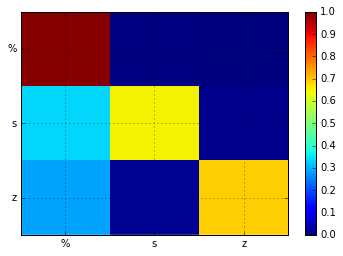

In [11]:
predictions = [net.predict(x)[0][0] for x, y in test_data]
print accuracy_score(y_true=dataset['y_test'], y_pred=predictions)
cm = confusion_matrix(y_true=dataset['y_test'], y_pred=predictions, labels=net.labels)
from numpy import newaxis
cm = cm.astype('float') / cm.sum(axis=1)[:, newaxis]

from matplotlib import pyplot as plt
plt.imshow(cm, aspect='auto', interpolation='none', vmin=0, vmax=1)
plt.xticks(range(len(net.labels)), net.labels)
plt.yticks(range(len(net.labels)), net.labels)
plt.grid()
plt.colorbar()
plt.show()

In [14]:
net.init_tailoring()
net.opt['tailoring'].add_neurons(class_labels=('s', 'z'), h=5)

In [8]:
print net.w[0].shape, net.w[1].shape

(21, 479) (10, 21)
